# Imports

In [84]:
from src.digit_functions import loadDigits, generateImage
from src.feature_functions import *
from DigitPreprocessing import preprocess

import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2 as cv

# Generated Digits Visualization

## Raw

In [85]:
digits = loadDigits("./data/digits")

(+) Reading data from .npy file...
(+) Digit loading finished


Train

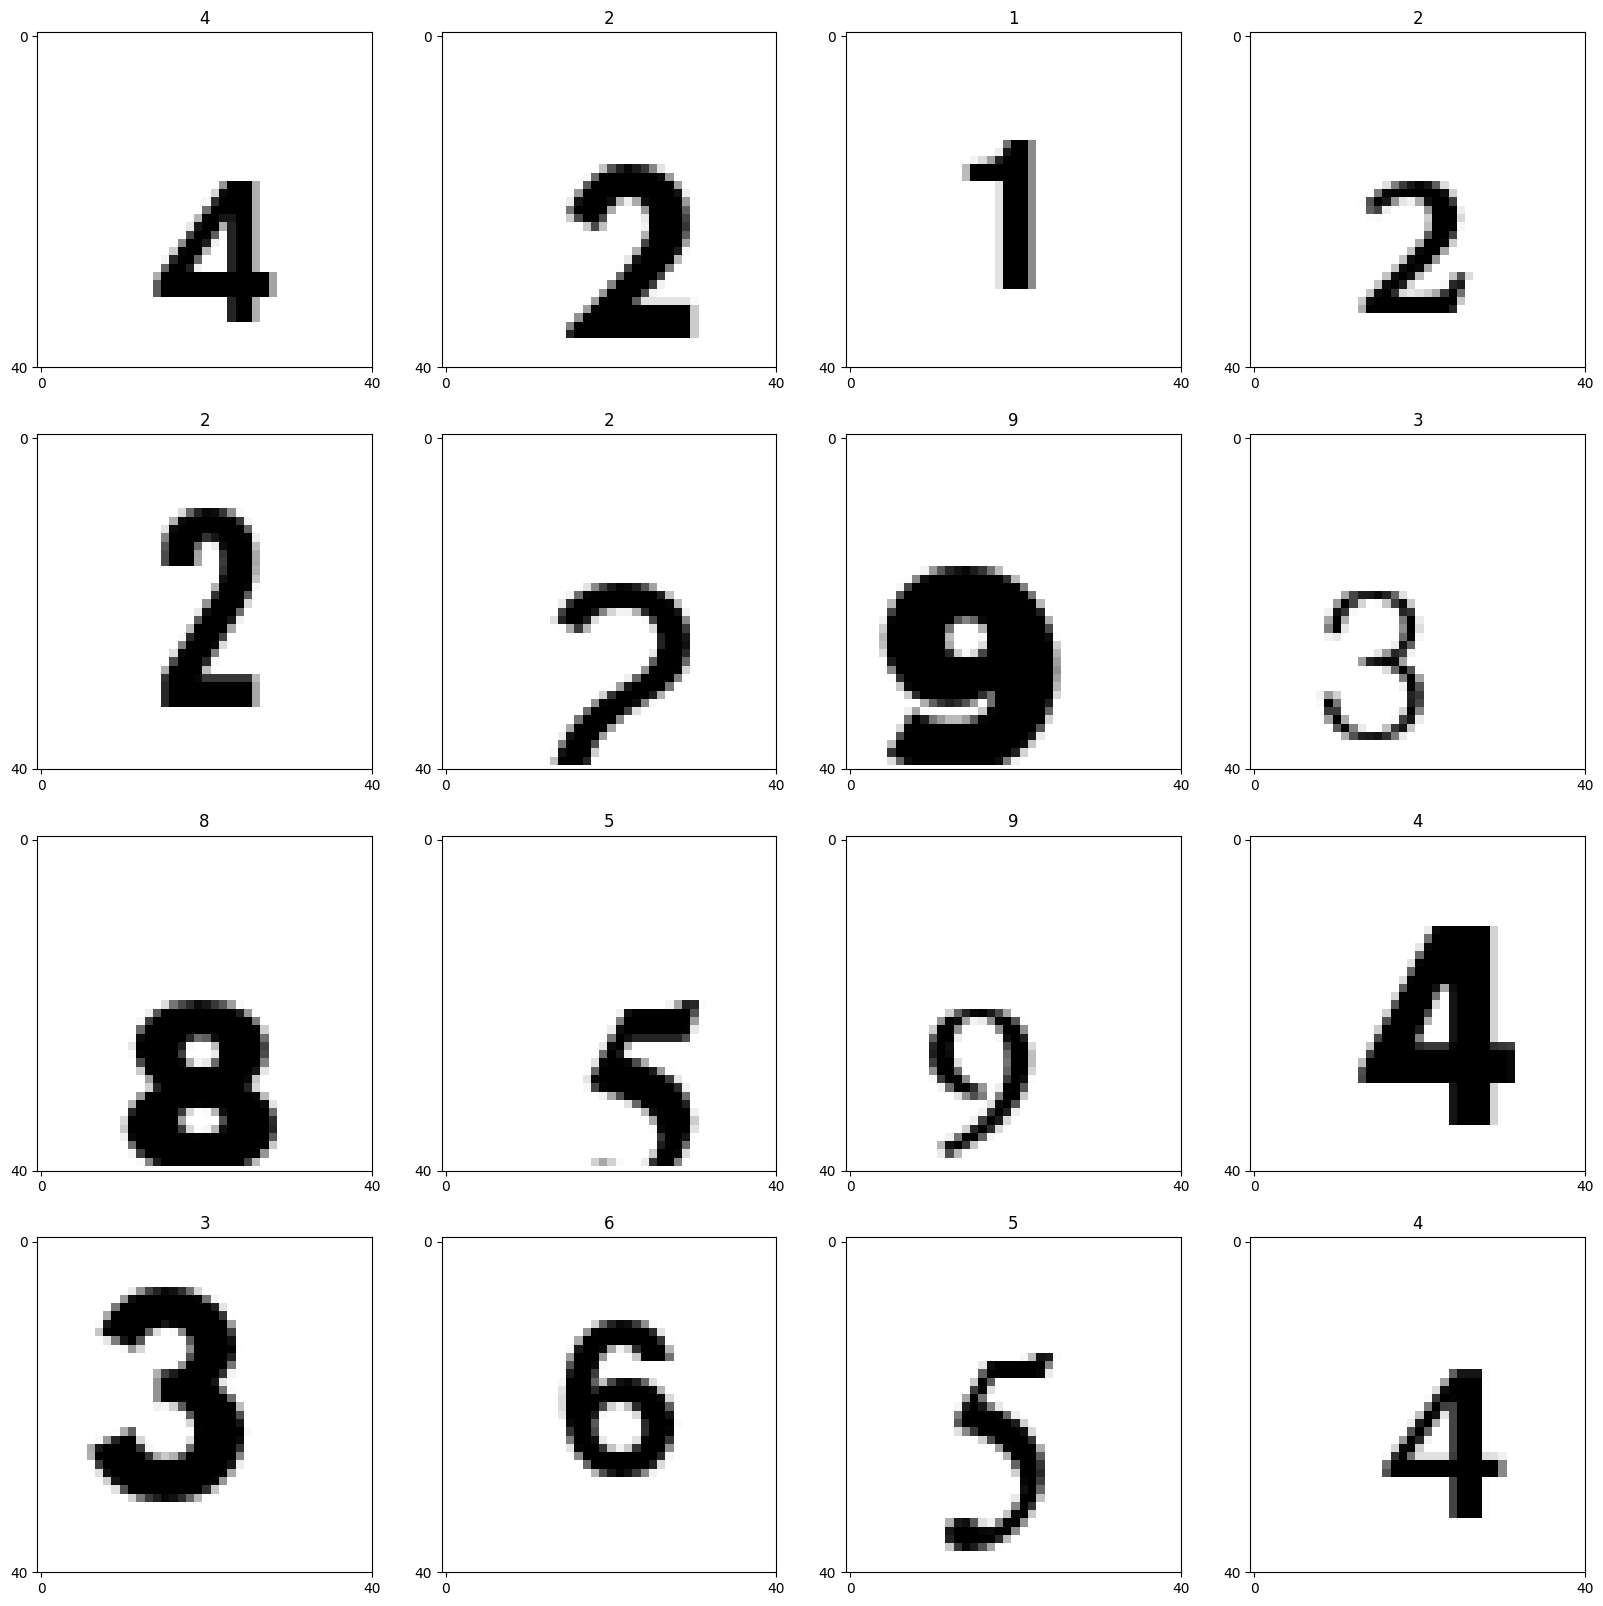

In [86]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.flatten()

np.random.seed(16)
indices = np.arange(digits[0][0].shape[0])
np.random.shuffle(indices)

for index, axis in zip(indices[:16], axs):
    axis.set_title(digits[0][1][indices[index]])
    axis.imshow(digits[0][0][indices[index]], cmap='gray')
    axis.set_xticks(np.array([0, 40]))
    axis.set_yticks(np.array([0, 40]))

plt.savefig("./figures/generatedSampleDigits-Train.png")

Test

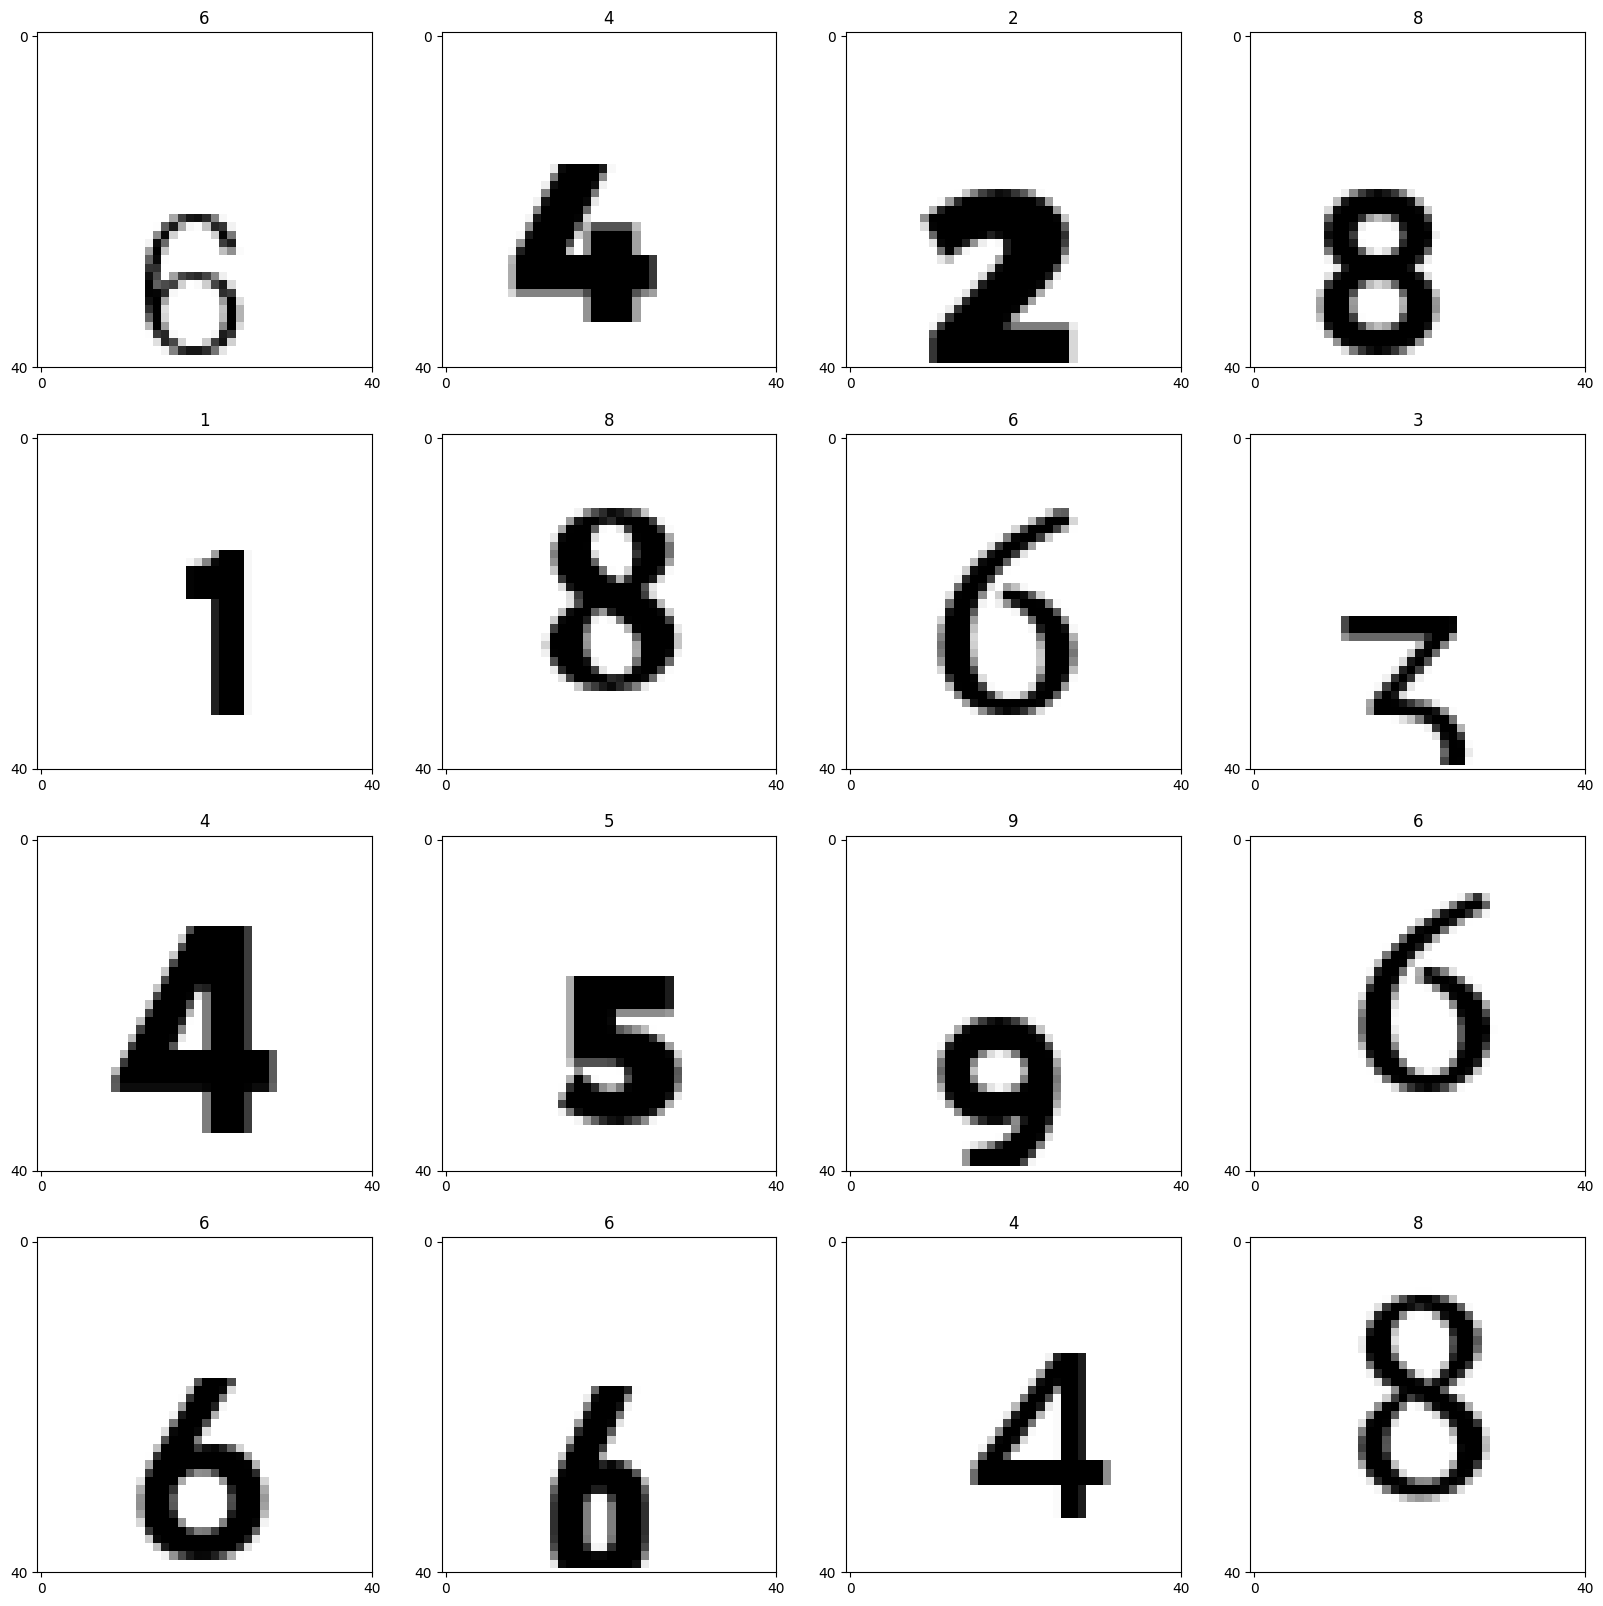

In [87]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.flatten()

np.random.seed(16)
indices = np.arange(digits[1][0].shape[0])
np.random.shuffle(indices)

for index, axis in zip(indices[:16], axs):
    axis.set_title(digits[1][1][indices[index]])
    axis.imshow(digits[1][0][indices[index]], cmap='gray')
    axis.set_xticks(np.array([0, 40]))
    axis.set_yticks(np.array([0, 40]))

plt.savefig("./figures/generatedSampleDigits-Test.png")

## Preprocessed

In [88]:
preprocessedDigits = loadDigits("./data/digits/preprocessed/")

(+) Reading data from .npy file...
(+) Digit loading finished


Train

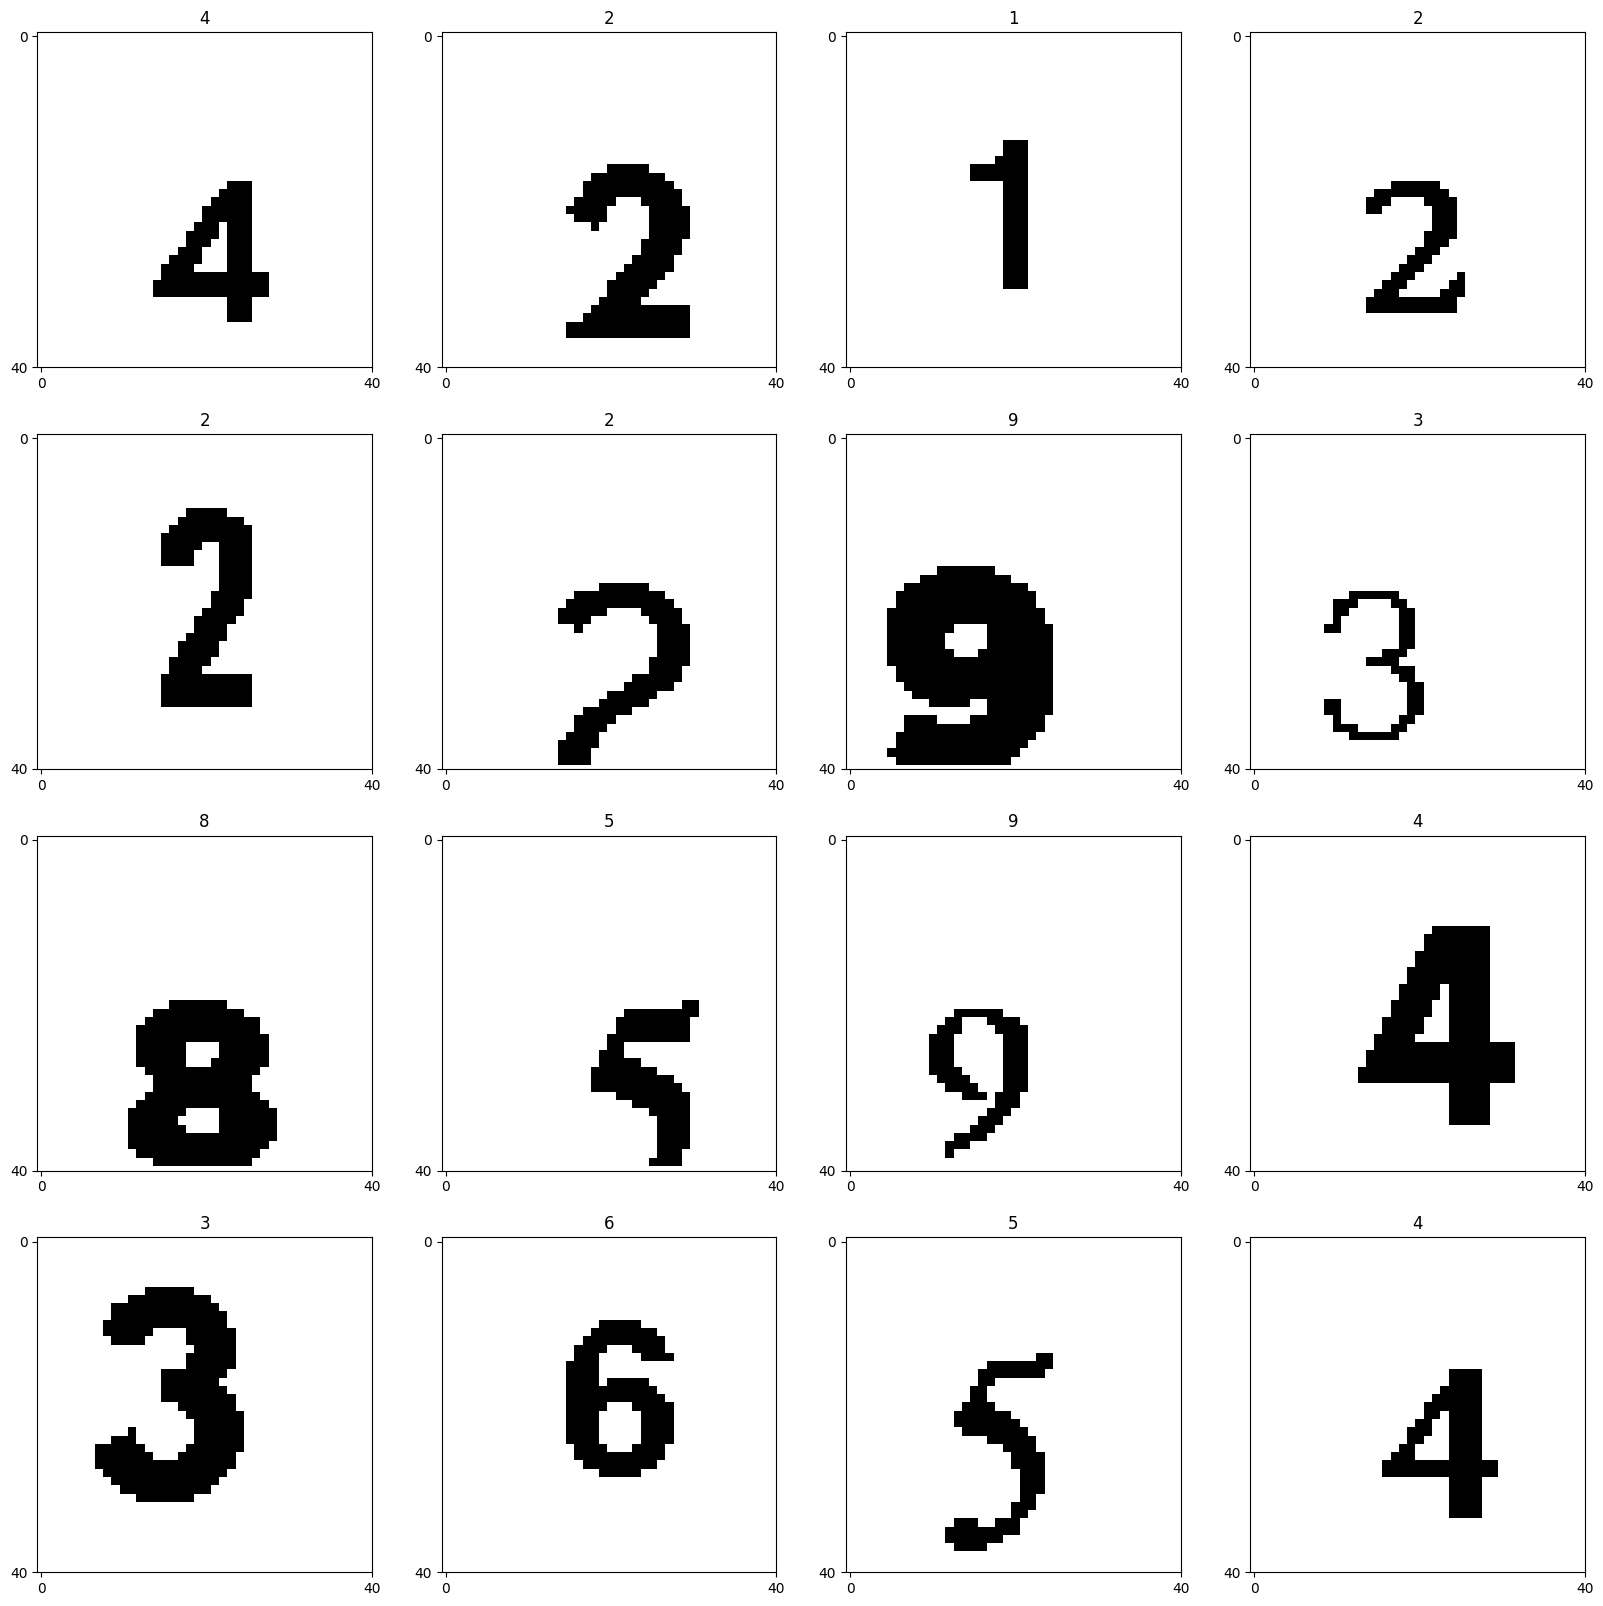

In [89]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.flatten()

np.random.seed(16)
indices = np.arange(preprocessedDigits[0][0].shape[0])
np.random.shuffle(indices)

for index, axis in zip(indices[:16], axs):
    axis.set_title(preprocessedDigits[0][1][indices[index]])
    axis.imshow(preprocessedDigits[0][0][indices[index]], cmap='gray')
    axis.set_xticks(np.array([0, 40]))
    axis.set_yticks(np.array([0, 40]))

plt.savefig("./figures/preprocessedSampleDigits-Train.png")

Test

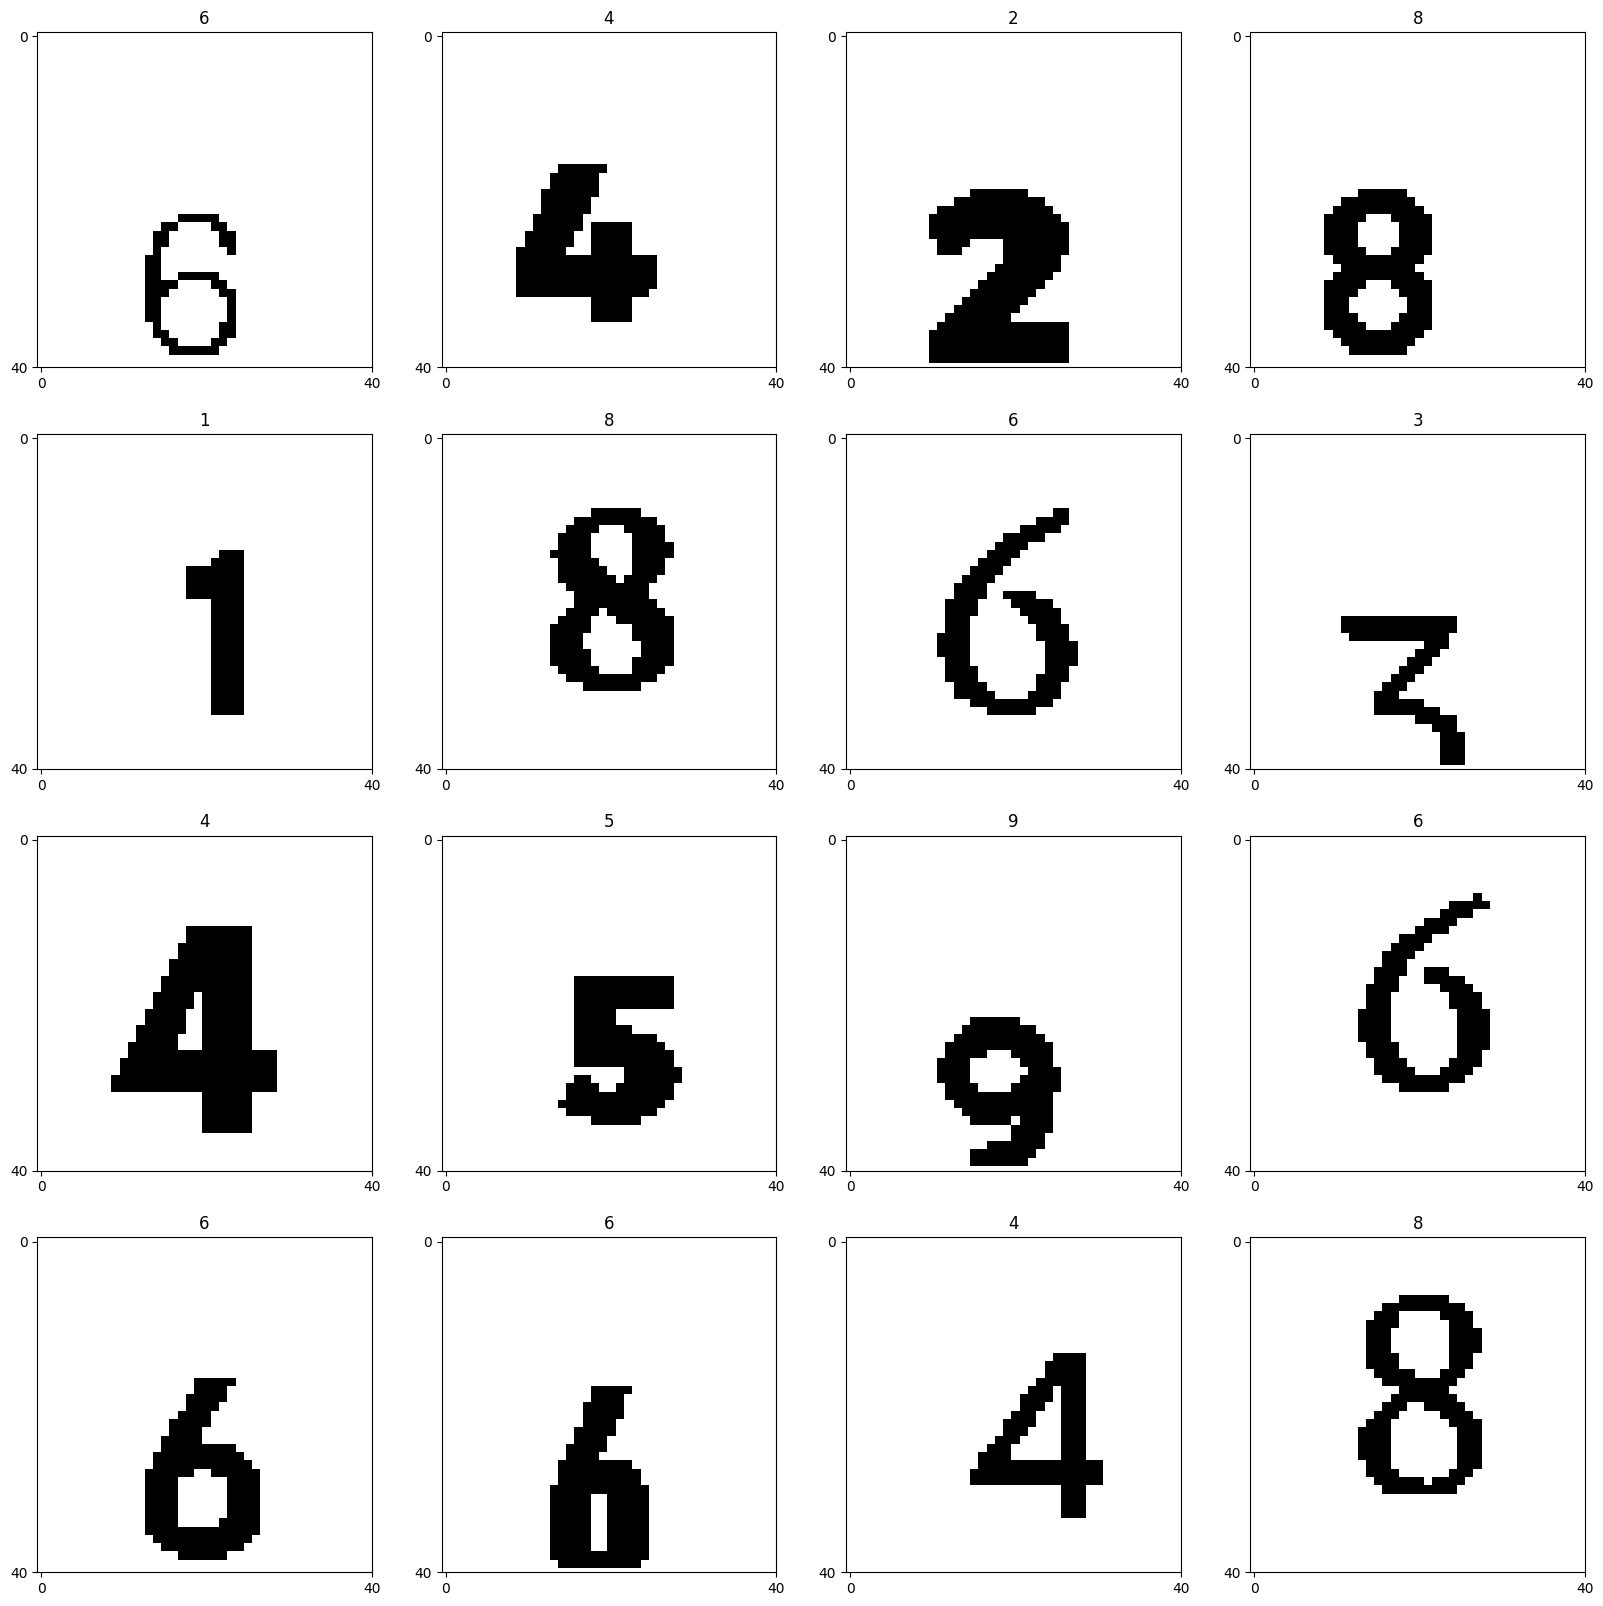

In [90]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs = axs.flatten()

np.random.seed(16)
indices = np.arange(preprocessedDigits[1][0].shape[0])
np.random.shuffle(indices)

for index, axis in zip(indices[:16], axs):
    axis.set_title(preprocessedDigits[1][1][indices[index]])
    axis.imshow(preprocessedDigits[1][0][indices[index]], cmap='gray')
    axis.set_xticks(np.array([0, 40]))
    axis.set_yticks(np.array([0, 40]))

plt.savefig("./figures/preprocessedSampleDigits-Test.png")

# Transformed Digits

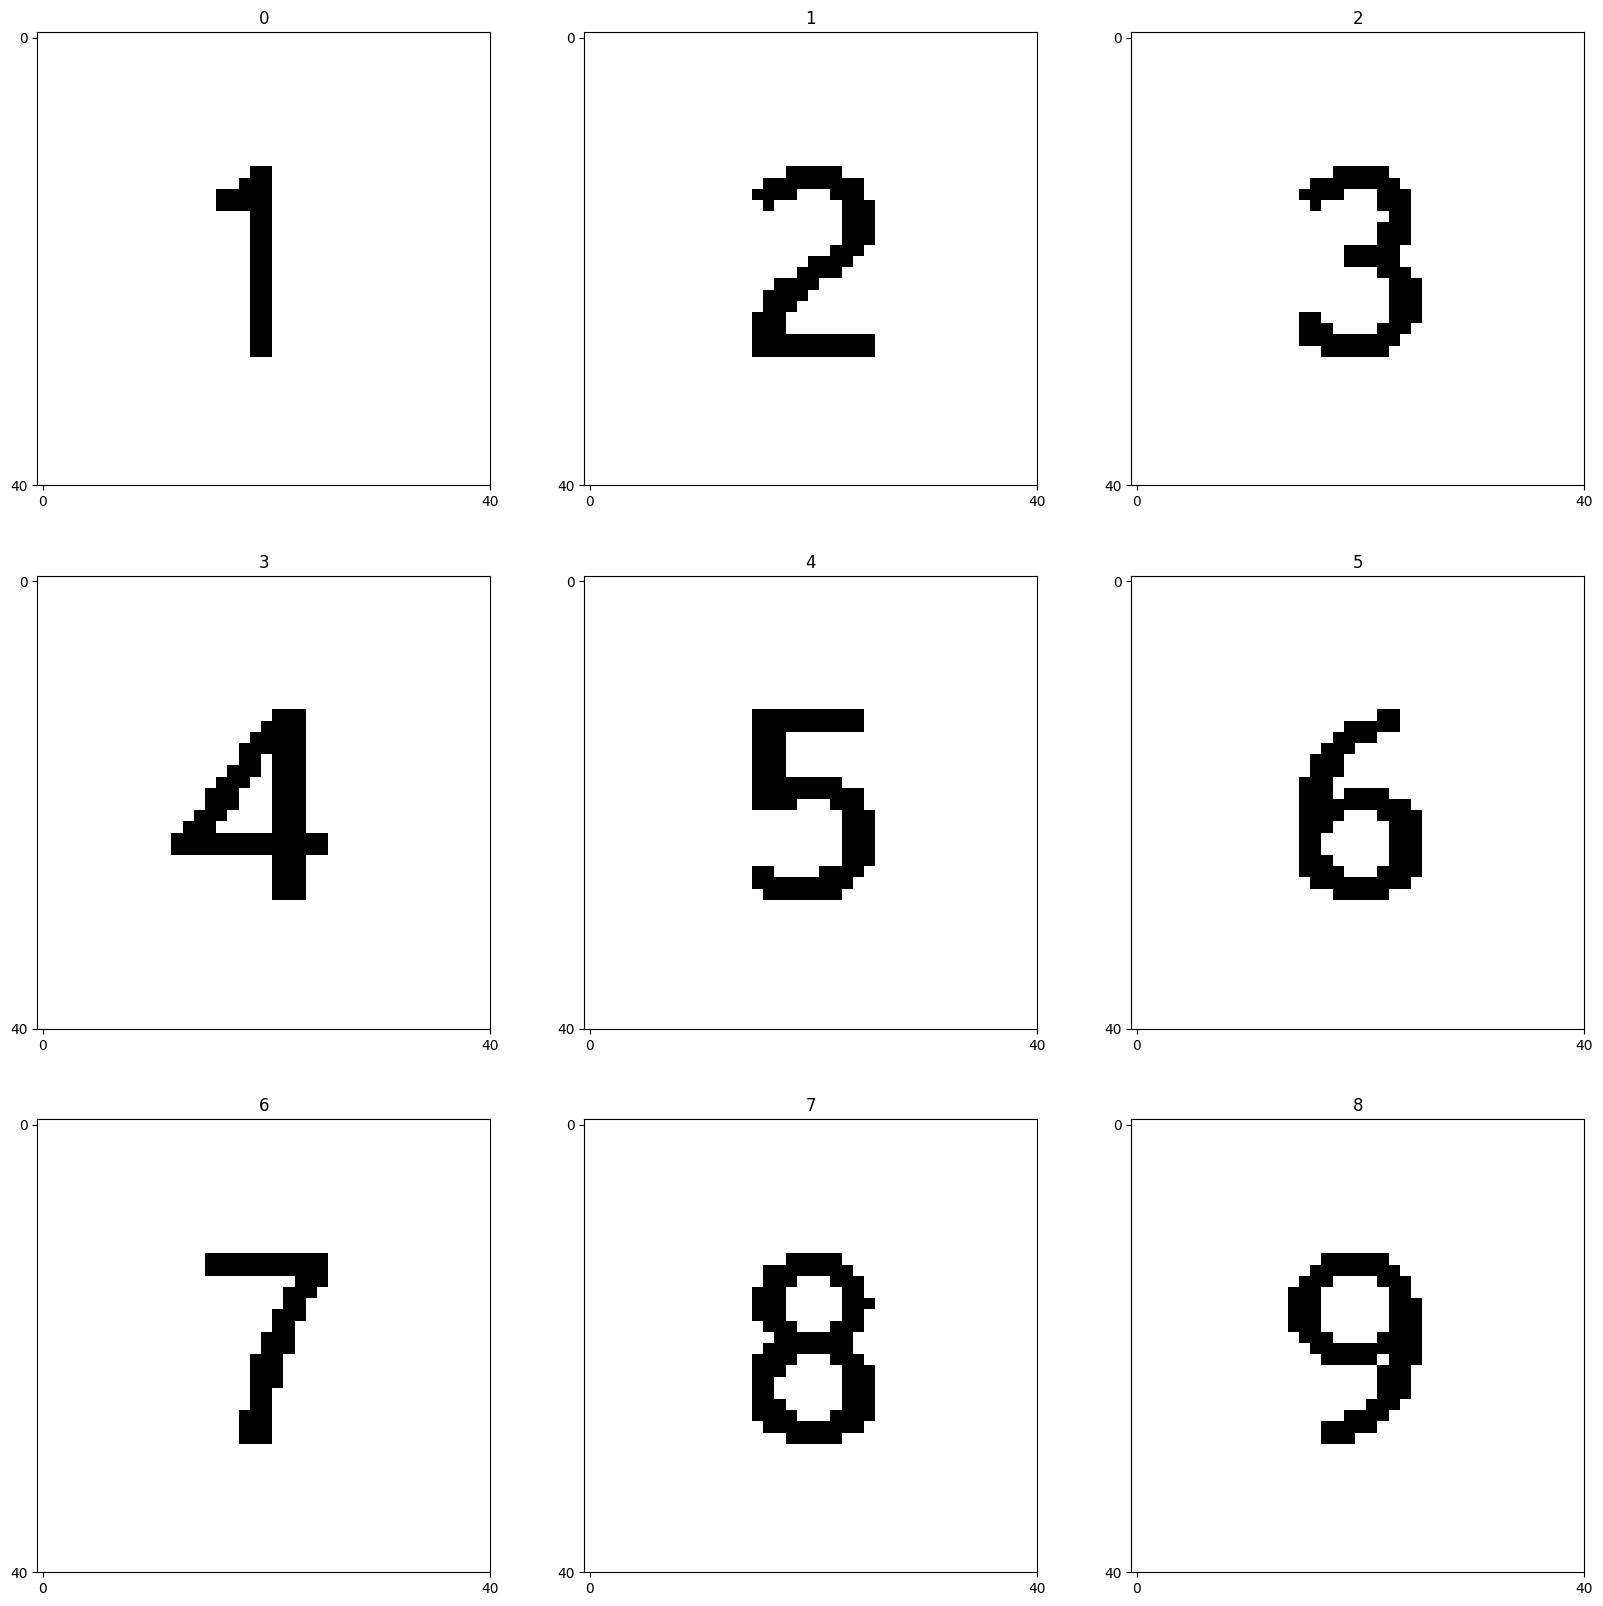

In [91]:
uniformPreprocessedDigits = []
fontPath = "./data/fonts/OverpassReg-8ygA.ttf"
for digit in range(1, 10): 
    text = str(digit)
    image = generateImage(text, (40, 40), fontPath, 24, (20, 13))[0]
    uniformPreprocessedDigits.append(preprocess(image))

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()
for digit, (image, axis) in enumerate(zip(uniformPreprocessedDigits, axs)):
    axis.set_title(str(digit))
    axis.imshow(image, cmap='gray')
    axis.set_xticks(np.array([0, 40]))
    axis.set_yticks(np.array([0, 40]))

plt.savefig("./figures/featureVisualizationSampleDigits.png")

### Pixel

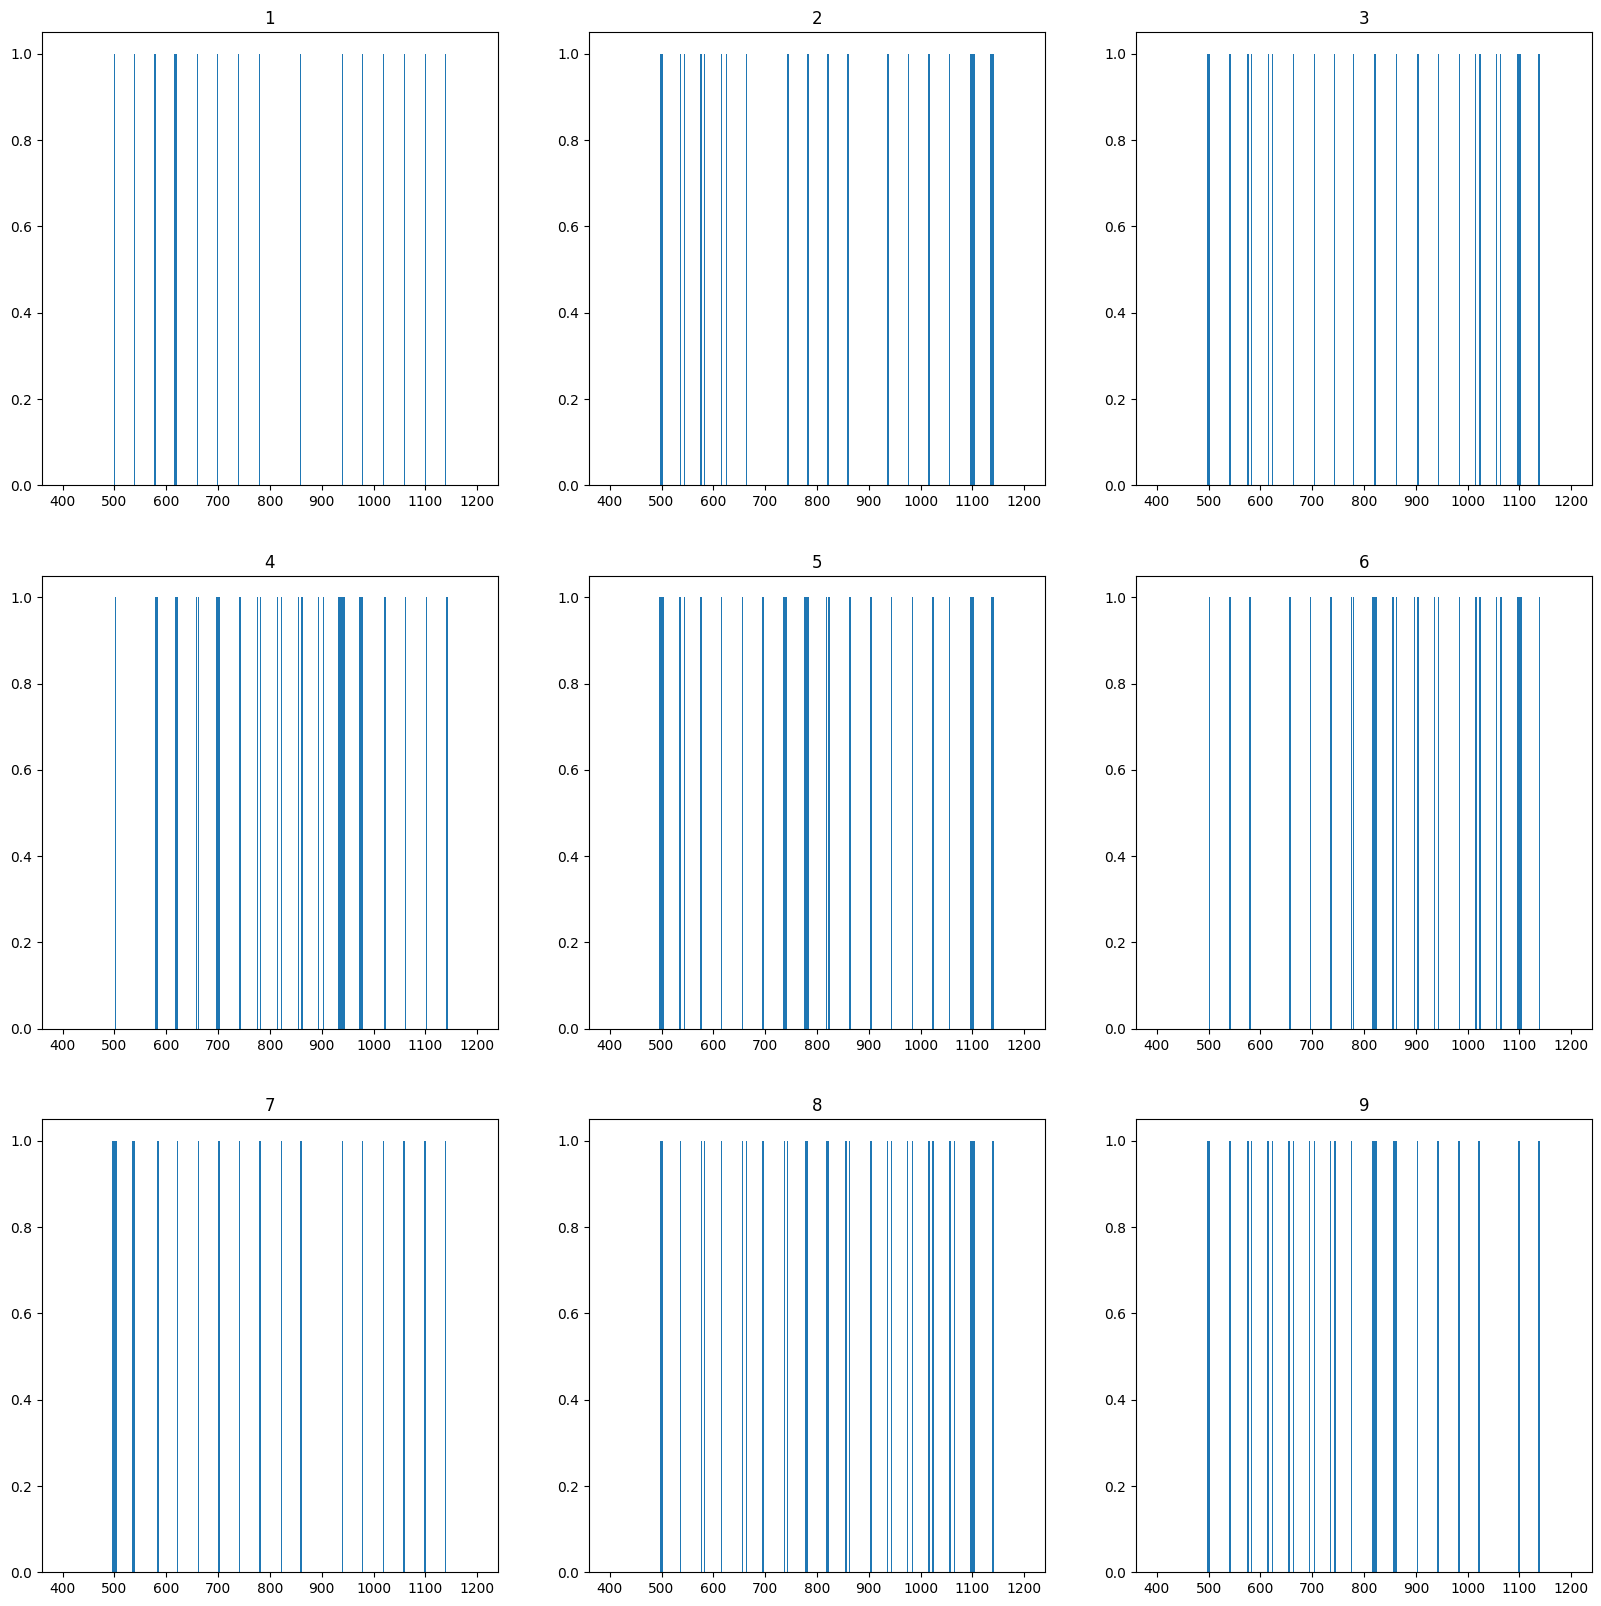

In [92]:
pixelTransformedData = []
for image in uniformPreprocessedDigits:
    pixelTransformedData.append(pixelFeatureFunction(image.copy()))

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()
x = np.arange(0, 1600, 1)
x = np.arange(400, 1200, 1)
for digit, (data, axis) in enumerate(zip(pixelTransformedData, axs)):
    axis.set_title(str(digit + 1))
    axis.bar(x, 1 - data[400: 1200])

plt.savefig("./figures/featureVisualizationPixel.png")

### Pixel Density

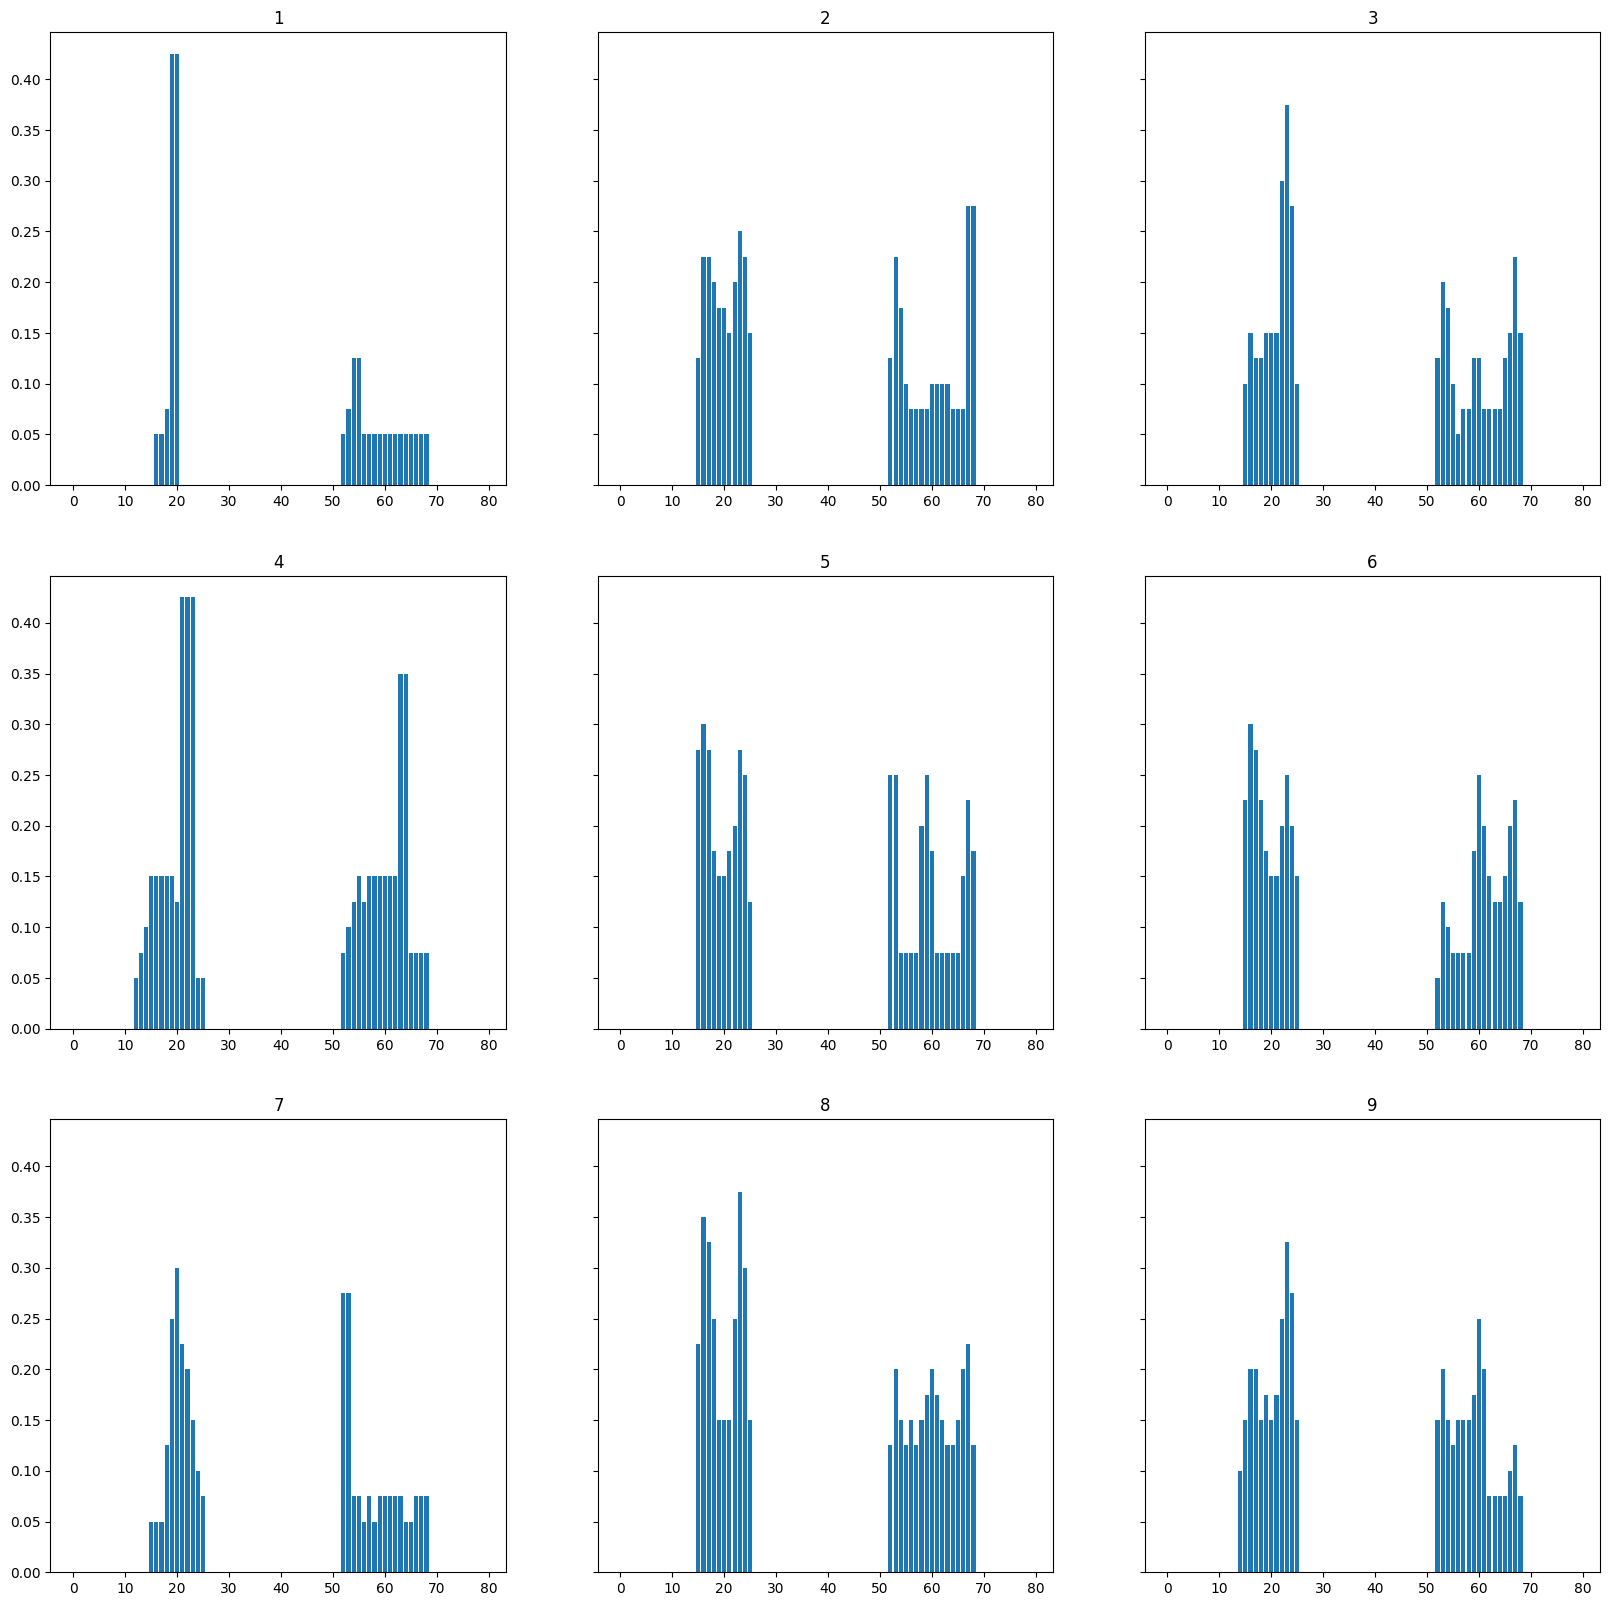

In [93]:
pixelDensityTransformedData = []
for image in uniformPreprocessedDigits:
    pixelDensityTransformedData.append(pixelDensityFeatureFunction(image.copy()))

fig, axs = plt.subplots(3, 3, figsize=(20, 20), sharey=True)
axs = axs.flatten()
x = np.arange(0, 80, 1)
for digit, (data, axis) in enumerate(zip(pixelDensityTransformedData, axs)):
    axis.set_title(str(digit + 1))
    axis.bar(x, data)

plt.savefig("./figures/featureVisualizationPixelDensity.png")

### Image Gradient Density

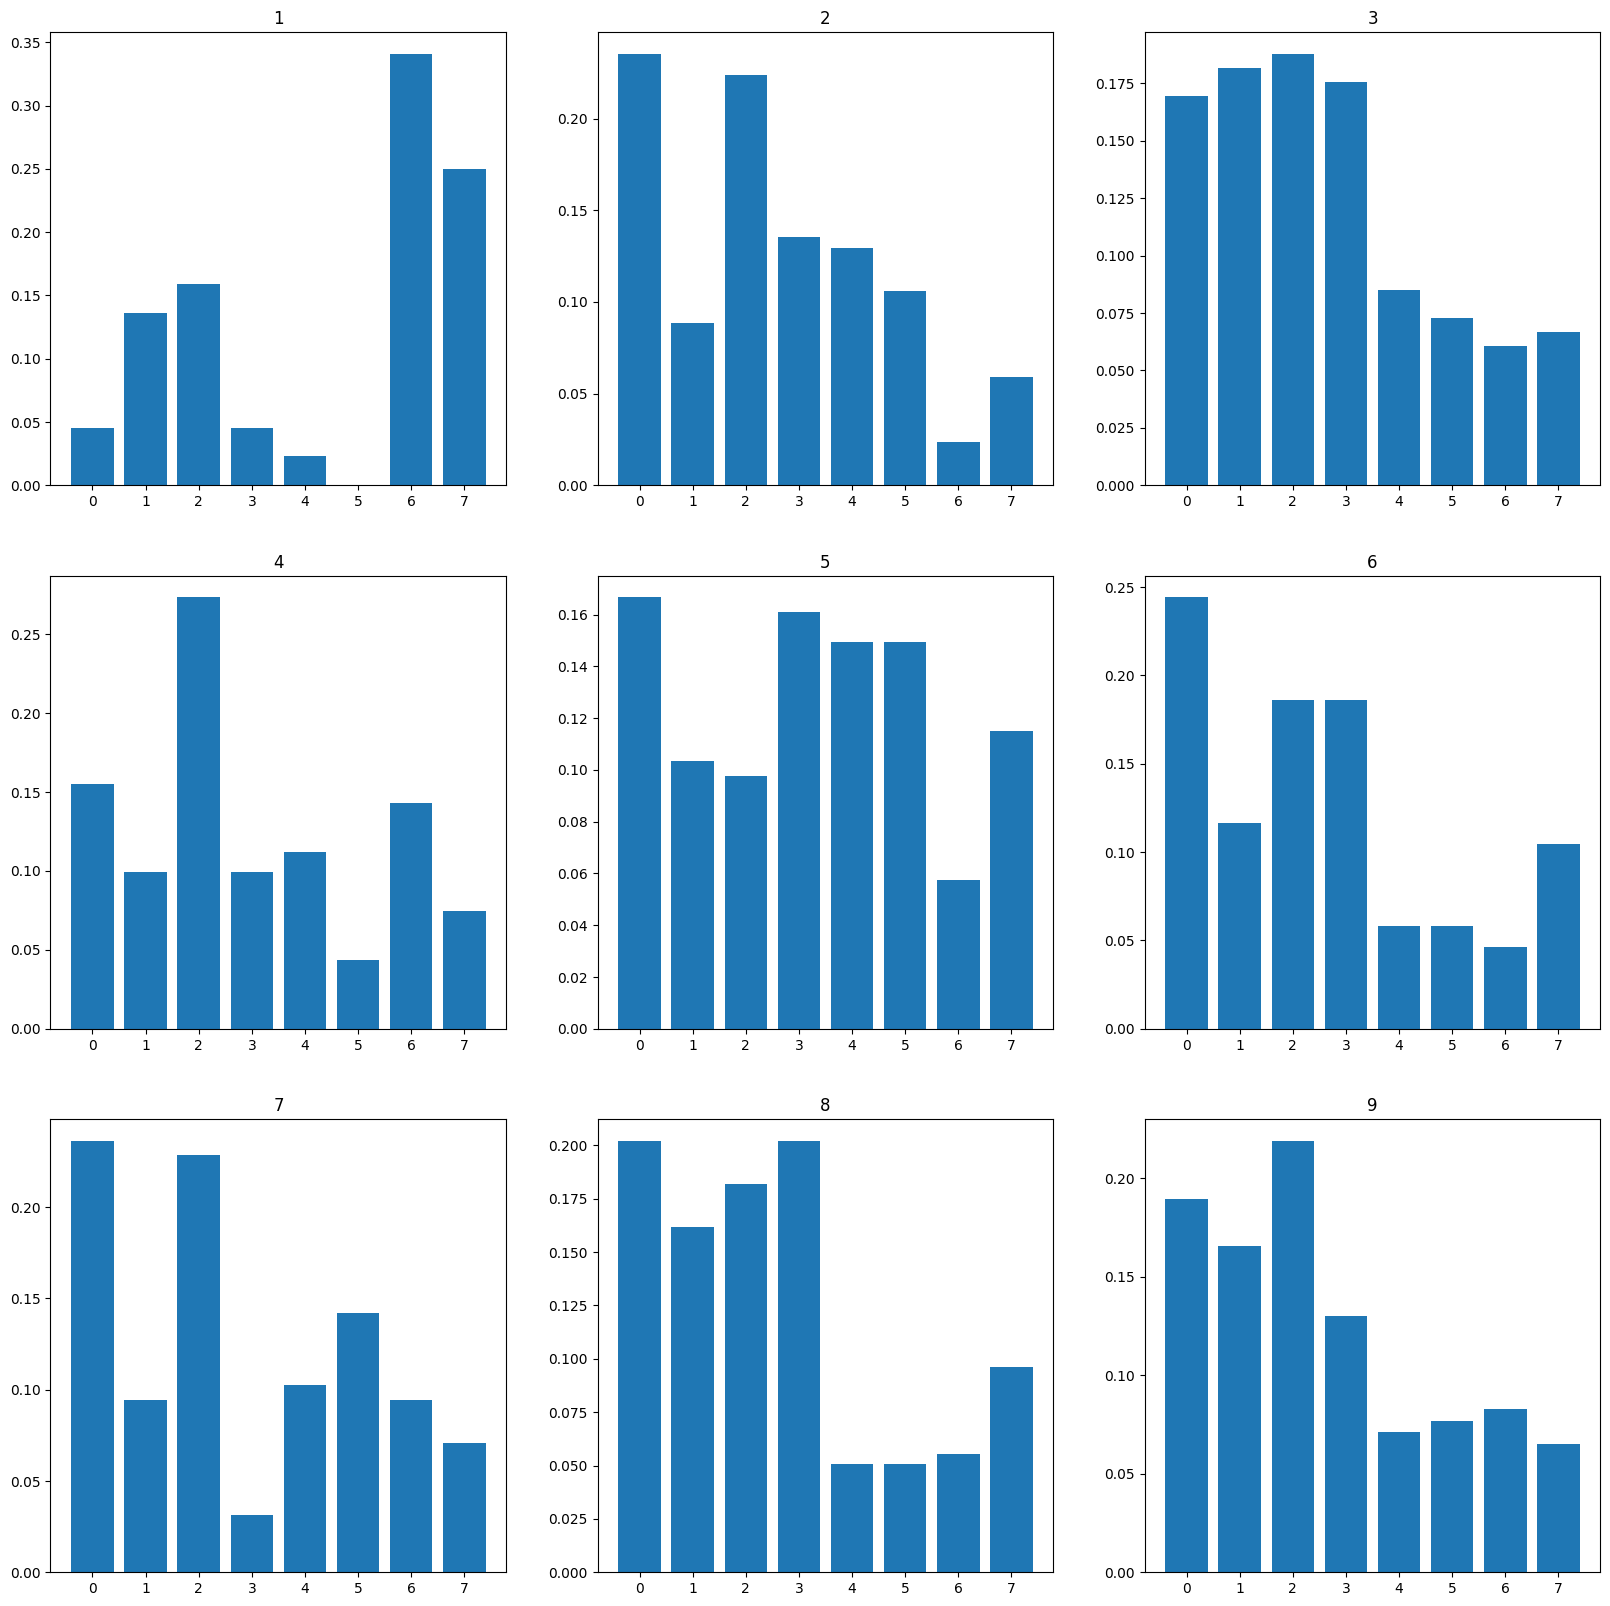

In [94]:
imageGradientDensityTransformedData = []
for image in uniformPreprocessedDigits:
    imageGradientDensityTransformedData.append(imageGradientDensityFeatureFunction(image.copy()))

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()
x = np.arange(0, 8, 1)
for digit, (data, axis) in enumerate(zip(imageGradientDensityTransformedData, axs)):
    axis.set_title(str(digit + 1))
    axis.bar(x, data)

plt.savefig("./figures/featureVisualizationImageGradientDensity.png")